In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combine = pd.merge(trial,mouse, on='Mouse ID')

# Display the data table for preview

combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group1 = combine.groupby(['Drug','Timepoint'])
mean_tumor = group1['Tumor Volume (mm3)'].mean()
# Convert to DataFrame

mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()
# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = group1['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor).reset_index()
# Preview DataFrame
sem_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean = mean_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem = sem_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean.head()
sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


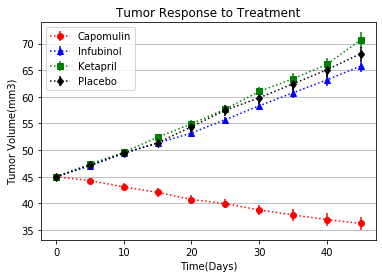

In [94]:
# Generate the Plot (with Error Bars)
# order: marker - line - color

druglist = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
style = {"Capomulin":'o:r', 'Infubinol':'^:b', 'Ketapril':'s:g', 'Placebo': 'd:k'}


fig, ax = plt.subplots()
for drug in druglist:
    ax.errorbar(mean.index, mean[drug], sem[drug], fmt= style[drug])

ax.legend(style)
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(True,axis='y')

plt.savefig("Tumor.png")
plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [55]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group2 = combine.groupby(['Drug','Timepoint'])
mean_met = group2['Metastatic Sites'].mean()
# Convert to DataFrame

mean_met_df = pd.DataFrame(mean_met).reset_index()
# Preview DataFrame
mean_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [58]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met = group2['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_df = pd.DataFrame(sem_met).reset_index()
# Preview DataFrame
sem_met_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [60]:
# Minor Data Munging to Re-Format the Data Frames
mean2 = mean_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
sem2 = sem_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


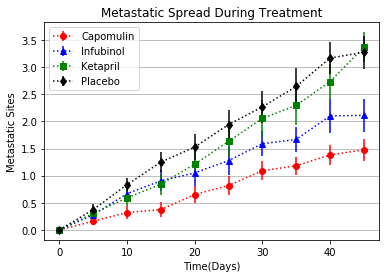

In [95]:
# Generate the Plot (with Error Bars)

druglist = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
style = {"Capomulin":'o:r', 'Infubinol':'^:b', 'Ketapril':'s:g', 'Placebo': 'd:k'}


fig2, ax2 = plt.subplots()
for drug in druglist:
    ax2.errorbar(mean2.index, mean2[drug], sem2[drug], fmt= style[drug])
ax2.legend(style)
plt.xlabel('Time(Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(True,axis='y')
# Save the Figure
plt.savefig("Metastatic")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [72]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = group['Mouse ID'].count()
# Convert to DataFrame

mice_df = pd.DataFrame(mice).reset_index()
# Preview DataFrame
mice_df = mice_df.rename(columns={"Mouse ID":"Mouse Count"})
mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [73]:
# Minor Data Munging to Re-Format the Data Frames
count = mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


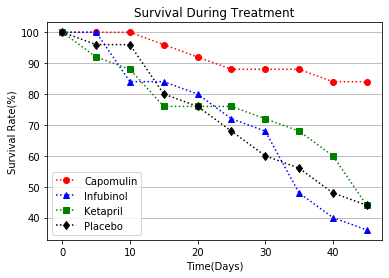

In [96]:
# Generate the Plot (Accounting for percentages)

druglist = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
style = {"Capomulin":'o:r', 'Infubinol':'^:b', 'Ketapril':'s:g', 'Placebo': 'd:k'}


fig3, ax3 = plt.subplots()
for drug in druglist:
    ax3.errorbar(count.index, count[drug]/count[drug][0]*100, fmt= style[drug])

plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.title('Survival During Treatment')
plt.grid(True,axis='y')
ax3.legend(style)
# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [106]:
percent = (mean.iloc[9, :] - mean.iloc[0,:])/mean.iloc[0,:] * 100


# Display the data to confirm
percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

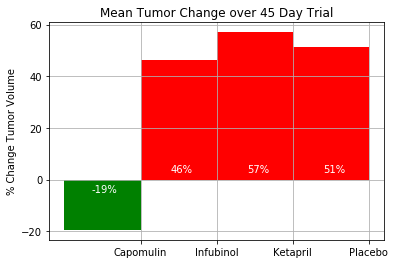

In [197]:
# Store all Relevant Percent Changes into a Tuple
percent_t = percent.to_frame()

# Splice the data between passing and failing drugs
percent_t = percent_t.rename(columns = {0 : "Percent Change"})
percent_t["Pass"] = (percent_t < 0)

# Orient widths. Add labels, tick marks, etc. 
fig4, ax4 = plt.subplots()
x=0
for drug in druglist:
    y = percent_t.loc[drug,'Percent Change']
    if percent_t.loc[drug, "Pass"] == True:
        ax4.bar(drug,y,align= 'edge',width = -1, color = 'g')
        plt.text(x-0.65,-5, '{:.0f}%'.format(y), color = "white")
    else:
        ax4.bar(drug,y, align= 'edge',width = -1, color = 'r')
        plt.text(x+.4,3,'{:.0f}%'.format(y), color = "white")
        x = x+1
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
ax4.xaxis.grid()
plt.title("Mean Tumor Change over 45 Day Trial")
plt.ylabel("% Change Tumor Volume")

# Save the Figure

plt.savefig('barchart.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)